In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor as LUdec

In [3]:
# Exercise 1
m = 100
n = 10

# Genera una matrice casuale A di dimensione m x n
A = np.random.rand(m, n)

# Scegli un vettore alpha_test (ad esempio, con elementi costanti)
alpha_test = np.ones(n)

# Calcola il termine noto y = A * alpha_test
y = A @ alpha_test

print('alpha test', alpha_test)

# Calcola A^T A e A^T y
ATA = A.T @ A
ATy = A.T @ y

# Risoluzione con fattorizzazione LU
lu, piv = LUdec(ATA)
alpha_LU = scipy.linalg.lu_solve((lu, piv), ATy)

print('alpha LU', alpha_LU)

# Risoluzione con fattorizzazione di Cholesky
L = scipy.linalg.cholesky(ATA)
x = scipy.linalg.solve_triangular(np.transpose(L), ATy, lower=True)
alpha_chol = scipy.linalg.solve_triangular(L, x, lower=False)

print('alpha chol', alpha_chol)

# Risoluzione con SVD
U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(n)

for i in range(n):
    ui = U[:, i]
    vi = Vh[i, :]
    alpha_svd += (ui @ y) * vi / s[i]

print('alpha SVD', alpha_svd)

# Calcolo degli errori relativi
err_rel_LU = np.linalg.norm(alpha_test - alpha_LU) / np.linalg.norm(alpha_test)
err_rel_chol = np.linalg.norm(alpha_test - alpha_chol) / np.linalg.norm(alpha_test)
err_rel_svd = np.linalg.norm(alpha_test - alpha_svd) / np.linalg.norm(alpha_test)

print('Errore relativo LU:', err_rel_LU)
print('Errore relativo Cholesky:', err_rel_chol)
print('Errore relativo SVD:', err_rel_svd)

alpha test [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
alpha LU [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
alpha chol [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape of U: (100, 100)
Shape of s: (10,)
Shape of V: (10, 10)
alpha SVD [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Errore relativo LU: 9.590424973279982e-15
Errore relativo Cholesky: 1.0203487176534668e-14
Errore relativo SVD: 1.0325671005860943e-15


[ 0.99315181  1.18619381 -0.77082962 -0.07787167  0.06176099 -0.00551072]


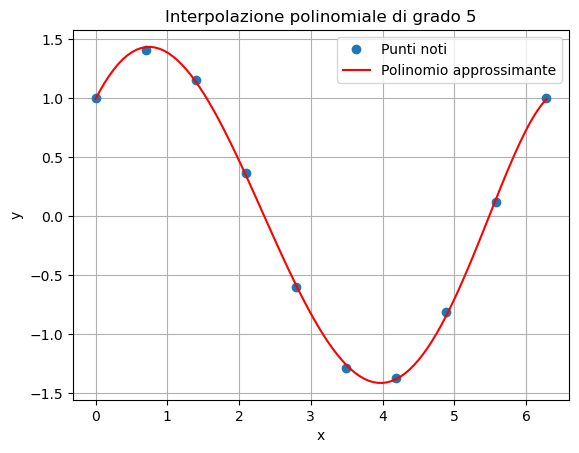

Residual:  0.06559431617547969


In [5]:
# Exercise 2
case = 2
m = 10
m_plot = 100

# Grado polinomio approssimante
n = 5

if case == 0:
    x = np.linspace(-1, 1, m)
    y = np.exp(x / 2)
elif case == 1:
    x = np.linspace(-1, 1, m)
    y = 1 / (1 + 25 * (x ** 2))
elif case == 2:
    x = np.linspace(0, 2 * np.pi, m)
    y = np.sin(x) + np.cos(x)

# Costruzione della matrice A per il problema dei minimi quadrati
A = np.zeros((m, n + 1))

for i in range(n + 1):
    A[:, i] = x ** i

# Risoluzione con SVD
U, s, Vh = scipy.linalg.svd(A)

alpha_svd = np.zeros(n + 1)

for i in range(n + 1):
    ui = U[:, i]
    vi = Vh[i, :]
    alpha_svd += (ui @ y) * vi / s[i]

print(alpha_svd)

# Valutazione del polinomio approssimante
x_plot = np.linspace(x[0], x[-1], m_plot)
A_plot = np.zeros((m_plot, n + 1))

for i in range(n + 1):
    A_plot[:, i] = x_plot ** i

y_interpolation = A_plot @ alpha_svd

# Plot dei risultati
plt.plot(x, y, 'o', label='Punti noti')
plt.plot(x_plot, y_interpolation, 'r', label='Polinomio approssimante')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Interpolazione polinomiale di grado {n}')
plt.grid()
plt.legend()
plt.show()

# Calcolo del residuo in norma 2
res = np.linalg.norm(y - A @ alpha_svd)
print('Residual: ', res)